In [1]:
!pip install torch --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [5]:
import torch
print(f"PyTorch CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch CUDA available: False


In [4]:
# Uninstall current PyTorch first
!pip uninstall torch torchvision torchaudio -y

# Install PyTorch with CUDA 12.1 (matching your driver's CUDA 13.0)
!pip install torch --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.10.0
Uninstalling torch-2.10.0:
  Successfully uninstalled torch-2.10.0
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 119.9 MB/s  0:00:0400:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 179.3 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 110.8 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 174.0 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 127.9 MB/s  0:00:0300:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 147.6 MB/s  0:00:0200:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 169.8 MB/s  0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 185.5 MB/s  0:00:00eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 181.3 MB/s  0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19

In [6]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121


In [7]:
!pip install torch --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.5.1%2Bcu121-cp311-cp311-linux_x86_64.whl (780.5 MB)


In [3]:
import torch
print(f"PyTorch CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch CUDA available: True
GPU: NVIDIA A100-SXM4-40GB MIG 1g.5gb


In [1]:
import numpy as np
import pandas as pd

DRIVE_URL = "https://drive.google.com/uc?id=1PS0eB8dx8VMzVvxNUc6wBzsMRkEKJjWI"
df = pd.read_csv(DRIVE_URL)

# ---------------- Physics rebuild ----------------
M_p = 938.272088
M_n = 939.565420
epsilon = 1e-30
LN10 = np.log(10.0)

def mass(Z,A): 
    return Z*M_p + (A-Z)*M_n

df["N1"] = df["A1"] - df["Z1"]
df["N2"] = df["A2"] - df["Z2"]

df["mass1"] = mass(df["Z1"], df["A1"])
df["mass2"] = mass(df["Z2"], df["A2"])

mu_red = (df["mass1"] * df["mass2"]) / (df["mass1"] + df["mass2"] + 1e-12)
v_over_c = np.sqrt(np.clip(2*df["E c.m."].values/(mu_red+epsilon),0,np.inf))
df["eta"] = (df["Z1"]*df["Z2"]) / ((1/137.036)*(v_over_c+1e-16))

df["Z1Z2_over_Ecm"] = (df["Z1"]*df["Z2"]) / (df["E c.m."] + epsilon)

MAGIC = np.array([2,8,20,28,50,82,126])
df["magic_dist_Z1"] = np.min(np.abs(df["Z1"].values[:,None] - MAGIC), axis=1)
df["magic_dist_N1"] = np.min(np.abs(df["N1"].values[:,None] - MAGIC), axis=1)
df["magic_dist_Z2"] = np.min(np.abs(df["Z2"].values[:,None] - MAGIC), axis=1)
df["magic_dist_N2"] = np.min(np.abs(df["N2"].values[:,None] - MAGIC), axis=1)

# Coulomb barrier
barrier_df = df.groupby("Reaction").first().reset_index()
barrier_df["V_B"] = (barrier_df["Z1"]*barrier_df["Z2"]*1.44) / barrier_df["R B"]
df = df.merge(barrier_df[["Reaction","V_B"]], on="Reaction", how="left")




# Coulomb parameter
v_over_c = np.sqrt(np.clip(2*df["E c.m."].values / (mu_red + epsilon), 0, np.inf))
e2_hbar_c = 1/137.035999

df["eta"] = (df["Z1"] * df["Z2"]) / (e2_hbar_c * (v_over_c + 1e-16))

# S-factor logs
log10_sigma_exp = np.log10(np.clip(df["σ"], 1e-30, np.inf))
log10_sigma_cal = np.log10(np.clip(df["σ cal"], 1e-30, np.inf))
log10_Ecm = np.log10(np.clip(df["E c.m."], 1e-30, np.inf))

df["log10_S_exp"] = log10_sigma_exp + log10_Ecm + (2*np.pi*df["eta"])/LN10
df["log10_S_cal"] = log10_sigma_cal + log10_Ecm + (2*np.pi*df["eta"])/LN10

df["delta_log10_S"] = df["log10_S_exp"] - df["log10_S_cal"]

print("delta_log10_S created.")
print("Dataset ready.")

delta_log10_S created.
Dataset ready.


In [2]:
import pennylane as qml
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# ---------- Device setup ----------
torch_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", torch_device)

# ---------- Hyperparameters (adjust these to scale up) ----------
n_qubits = 12                # Increase from 10 to 12 (or 14)
n_layers = 10                # Increase from 8 to 10 (or 12)
batch_size = 64              # Can increase to 128 if GPU memory allows
learning_rate = 1e-3
epochs = 100                 # Max epochs (early stopping will stop earlier)
patience = 15                # Stop if no improvement for 15 epochs

# PennyLane device (default.qubit with backprop – uses GPU automatically if tensors are on GPU)
dev = qml.device("default.qubit", wires=n_qubits)
# dev = qml.device("lightning.gpu", wires=n_qubits)

Using device: cuda


In [3]:
@qml.qnode(dev, interface="torch", diff_method="backprop")
# @qml.qnode(dev, interface="torch", diff_method="adjoint")
def qnode_single(weights, x):
    """
    weights: (n_layers, n_qubits, 3)
    x: (n_qubits,) – one sample
    """
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

In [4]:
class QuantumRegressor(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.encoder = nn.Linear(in_dim, n_qubits)
        self.q_weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3))
        self.fc1 = nn.Linear(n_qubits, 16)          # smaller head
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = x.float()
        x_enc = torch.tanh(self.encoder(x))
        q_out_tuple = qnode_single(self.q_weights, x_enc)
        q_out = torch.stack(q_out_tuple, dim=1)
        q_out = q_out.to(x.dtype)
        h = torch.relu(self.fc1(q_out))
        h = self.dropout(h)
        out = self.fc2(h)
        return out

In [ ]:

# Extract X and y
X = df[features_train].values.astype(np.float32)
y = df["delta_log10_S"].values.astype(np.float32).reshape(-1, 1)

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reaction‑wise split (load your split files)
OUTDIR_BASE = "mdn_70_10_20_optimized"   # <--- ADJUST IF NEEDED
train_reacts = pd.read_csv(f"{OUTDIR_BASE}/train_reactions.csv")["Reaction"].values
val_reacts   = pd.read_csv(f"{OUTDIR_BASE}/val_reactions.csv")["Reaction"].values
test_reacts  = pd.read_csv(f"{OUTDIR_BASE}/test_reactions.csv")["Reaction"].values

train_mask = df["Reaction"].isin(train_reacts)
val_mask   = df["Reaction"].isin(val_reacts)
test_mask  = df["Reaction"].isin(test_reacts)

X_train = X_scaled[train_mask]
y_train = y[train_mask]
X_val   = X_scaled[val_mask]
y_val   = y[val_mask]
X_test  = X_scaled[test_mask]
y_test  = y[test_mask]

# Convert to torch tensors (CPU initially)
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t   = torch.tensor(X_val, dtype=torch.float32)
y_val_t   = torch.tensor(y_val, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test, dtype=torch.float32)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t),
                          batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t),
                          batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t),
                          batch_size=batch_size, shuffle=False)

print(f"Train samples: {X_train.shape[0]}, Val samples: {X_val.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}, Test batches: {len(test_loader)}")

In [22]:
model = QuantumRegressor(in_dim=29).to(torch_device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

# Early stopping variables
best_val_loss = float('inf')
patience_counter = 0
best_epoch = 0

print("Model parameters device:", next(model.parameters()).device)  # Should be cuda:0

Model parameters device: cuda:0


/srv/conda/envs/notebook/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
for epoch in range(epochs):
    # ---------- Training ----------
    model.train()
    train_loss = 0.0
    start_time = time.time()

    for xb, yb in train_loader:
        xb, yb = xb.to(torch_device), yb.to(torch_device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # ---------- Validation ----------
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(torch_device), yb.to(torch_device)
            preds = model(xb)
            loss = criterion(preds, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    # Step the learning rate scheduler
    scheduler.step(val_loss)

    epoch_time = time.time() - start_time
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1:3d}/{epochs} | Time: {epoch_time:.2f}s | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f} | LR: {current_lr:.2e}")

    # ---------- Early Stopping Check ----------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print(f"  *** New best model saved (val loss: {val_loss:.6f}) ***")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered after epoch {epoch+1} (best at epoch {best_epoch+1})")
            break

print("Training finished.")

In [15]:
# Load the best model
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

# Evaluate on test set
test_loss = 0.0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(torch_device), yb.to(torch_device)
        preds = model(xb)
        loss = criterion(preds, yb)
        test_loss += loss.item()
test_loss /= len(test_loader)

print(f"Test Loss (best model): {test_loss:.6f}")

/tmp/ipykernel_23642/1556161386.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pt"))


Test Loss (best model): 0.059028


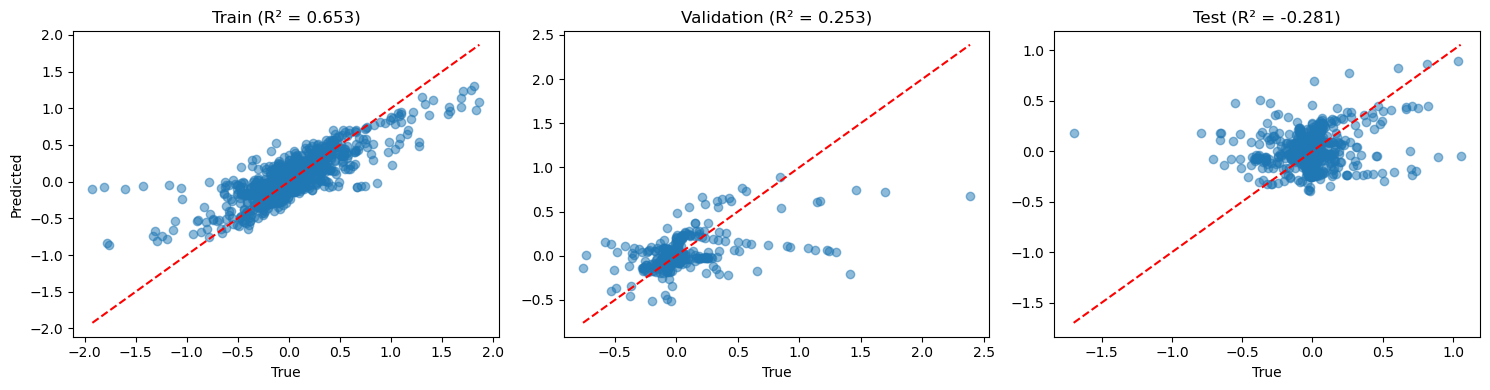

In [16]:
# Collect predictions for train/val/test
model.eval()
with torch.no_grad():
    train_pred = model(X_train_t.to(torch_device)).cpu().numpy()
    val_pred   = model(X_val_t.to(torch_device)).cpu().numpy()
    test_pred  = model(X_test_t.to(torch_device)).cpu().numpy()

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(y_train, train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(f"Train (R² = {1 - np.var(y_train - train_pred)/np.var(y_train):.3f})")

plt.subplot(1,3,2)
plt.scatter(y_val, val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True")
plt.title(f"Validation (R² = {1 - np.var(y_val - val_pred)/np.var(y_val):.3f})")

plt.subplot(1,3,3)
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True")
plt.title(f"Test (R² = {1 - np.var(y_test - test_pred)/np.var(y_test):.3f})")

plt.tight_layout()
plt.show()

In [17]:
# ============================================================
# LOAD BEST MODEL
# ============================================================

model.load_state_dict(torch.load("best_model.pt"))
model.eval()

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate_model(loader, name):
    preds = []
    truth = []
    
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(torch_device)
            out = model(xb)
            preds.append(out.cpu().numpy())
            truth.append(yb.numpy())
    
    preds = np.vstack(preds)
    truth = np.vstack(truth)
    
    mse = mean_squared_error(truth, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(truth, preds)
    
    print(f"\n{name} RESULTS")
    print(f"MSE  : {mse:.6f}")
    print(f"RMSE : {rmse:.6f}")
    print(f"R2   : {r2:.6f}")
    
    return r2, rmse


# ============================================================
# EVALUATE
# ============================================================

r2_train, rmse_train = evaluate_model(train_loader, "TRAIN")
r2_val, rmse_val     = evaluate_model(val_loader, "VALIDATION")
r2_test, rmse_test   = evaluate_model(test_loader, "TEST")

/tmp/ipykernel_23642/798825926.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pt"))



TRAIN RESULTS
MSE  : 0.027533
RMSE : 0.165932
R2   : 0.647591

VALIDATION RESULTS
MSE  : 0.081126
RMSE : 0.284826
R2   : 0.250019

TEST RESULTS
MSE  : 0.060328
RMSE : 0.245618
R2   : -0.287099
